# Pymaceuticals Inc.
---

### Analysis

- My analysis for the below information follows. The drug regimen Capomulin had the most amount of timepoints and shows no signs of outliers within the data. The correlation coefficient being 0.84 indicates a strong positive relationship between the average tumor value and the weight of the mice. 
 

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how="right")

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [60]:
# Checking the number of mice.
num_mice = merged_data['Mouse ID'].nunique()
num_mice

249

In [61]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [62]:
# Optional: Get all the data for the duplicate mouse ID.


In [63]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data.drop_duplicates(subset=['Mouse ID','Timepoint'], keep='first')
cleaned_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [64]:
# Checking the number of mice in the clean DataFrame.
cleaned_data_unique = cleaned_data['Mouse ID'].nunique()
cleaned_data_unique

249

## Summary Statistics

In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_data = cleaned_data.groupby('Drug Regimen')
summary_stats = pd.DataFrame({
    "Mean Tumor Volume": grouped_data['Tumor Volume (mm3)'].mean(),
    "Median Tumor Volume": grouped_data['Tumor Volume (mm3)'].median(),
    "Tumor Volume Variance": grouped_data['Tumor Volume (mm3)'].var(),
    "Tumor Volume Std. Dev.": grouped_data['Tumor Volume (mm3)'].std(),
    "Tumor Volume Std. Err.": grouped_data['Tumor Volume (mm3)'].sem()
})
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [66]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

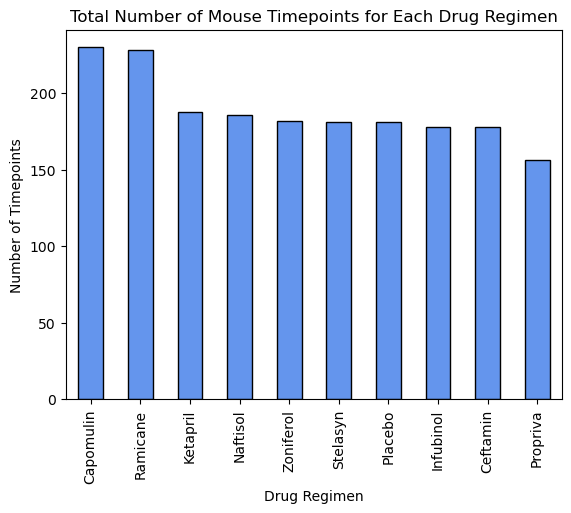

In [67]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = cleaned_data['Drug Regimen'].value_counts()
regimen_counts.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title('Total Number of Mouse Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.show()

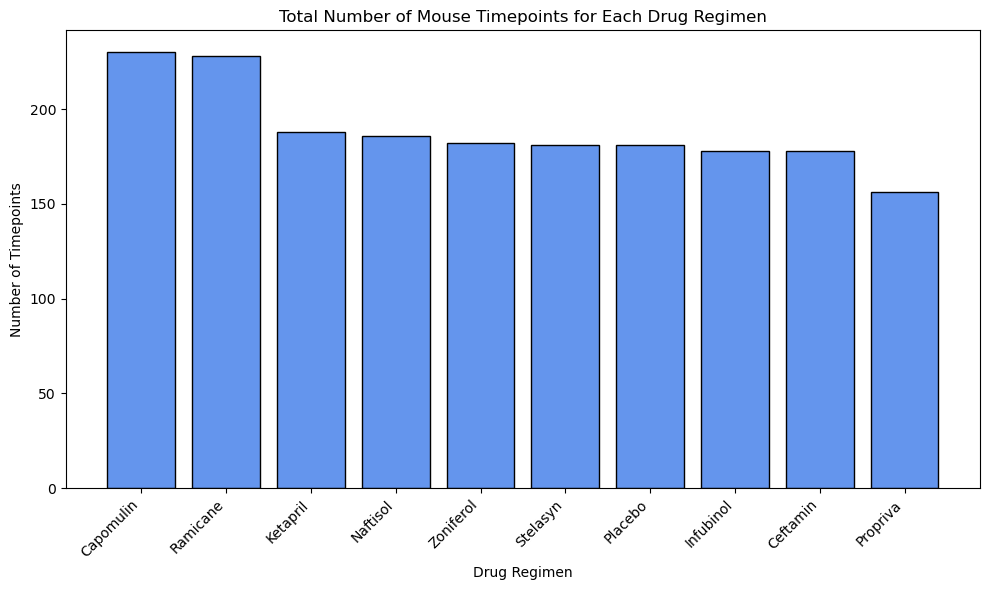

In [68]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = cleaned_data['Drug Regimen'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values, color='cornflowerblue', edgecolor='black')
plt.title('Total Number of Mouse Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()

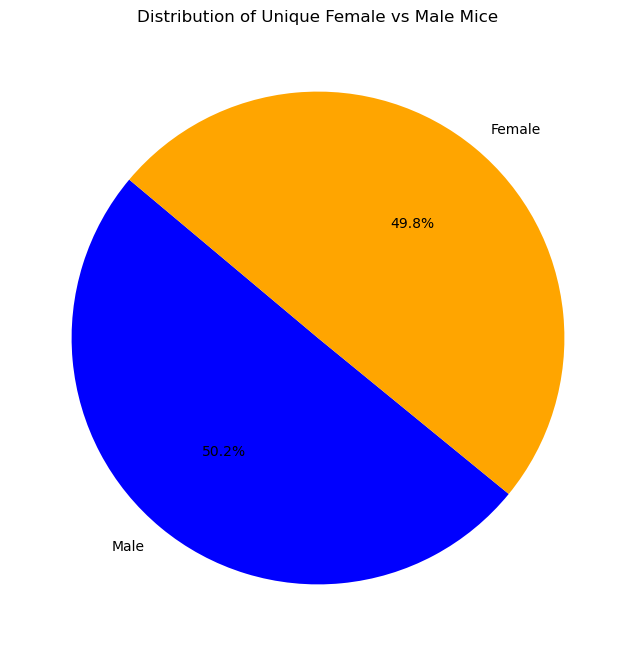

In [69]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = cleaned_data[['Mouse ID', 'Sex']].drop_duplicates()
gender_counts = unique_mice['Sex'].value_counts()
# Make the pie chart
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'], startangle=140, figsize=(8, 8))
plt.title('Distribution of Unique Female vs Male Mice')
plt.ylabel('') 
plt.show()

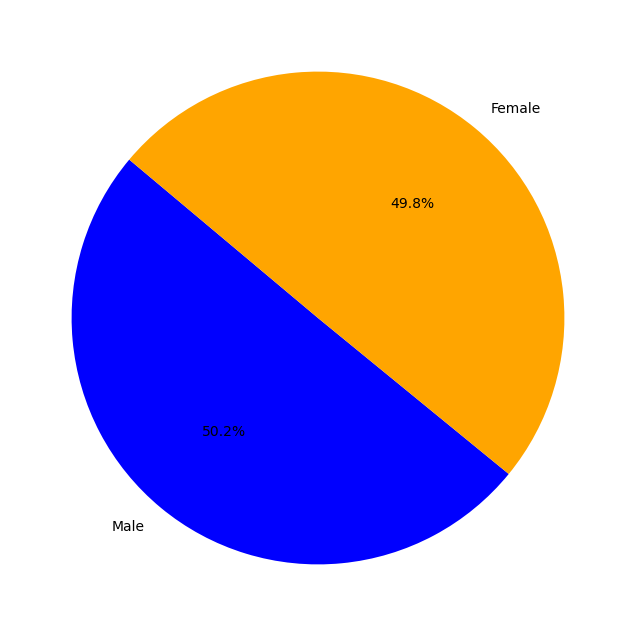

In [70]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['blue', 'orange'], startangle=140)
plt.show()

## Quartiles, Outliers and Boxplots

In [71]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = cleaned_data[cleaned_data['Drug Regimen'].isin(treatment_regimens)]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = filtered_data.groupby('Mouse ID').agg({'Timepoint': 'max'}).reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(last_timepoint_df, filtered_data, on=['Mouse ID', 'Timepoint'])
final_tumor_volume_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [72]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = treatment_regimens

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    treatment_data = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == treatment]

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = treatment_data['Tumor Volume (mm3)']
    Q1 = np.percentile(tumor_volume, 25)
    Q3 = np.percentile(tumor_volume, 75)
    IQR = Q3 - Q1
    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f'Treatment: {treatment}')
    print(f'Q1: {Q1}')
    print(f'Q3: {Q3}')
    print(f'IQR: {IQR}')
    print(f'Lower Bound: {lower_bound}')
    print(f'Upper Bound: {upper_bound}')
    outliers = treatment_data[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(f'Potential Outliers: {outliers.shape[0]}')
    tumor_volumes.append(tumor_volume)


Treatment: Capomulin
Q1: 32.37735684
Q3: 40.1592203
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential Outliers: 0
Treatment: Ramicane
Q1: 31.56046955
Q3: 40.65900627
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential Outliers: 0
Treatment: Infubinol
Q1: 54.04860769
Q3: 65.52574285
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential Outliers: 1
Treatment: Ceftamin
Q1: 48.72207785
Q3: 64.29983003
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential Outliers: 0


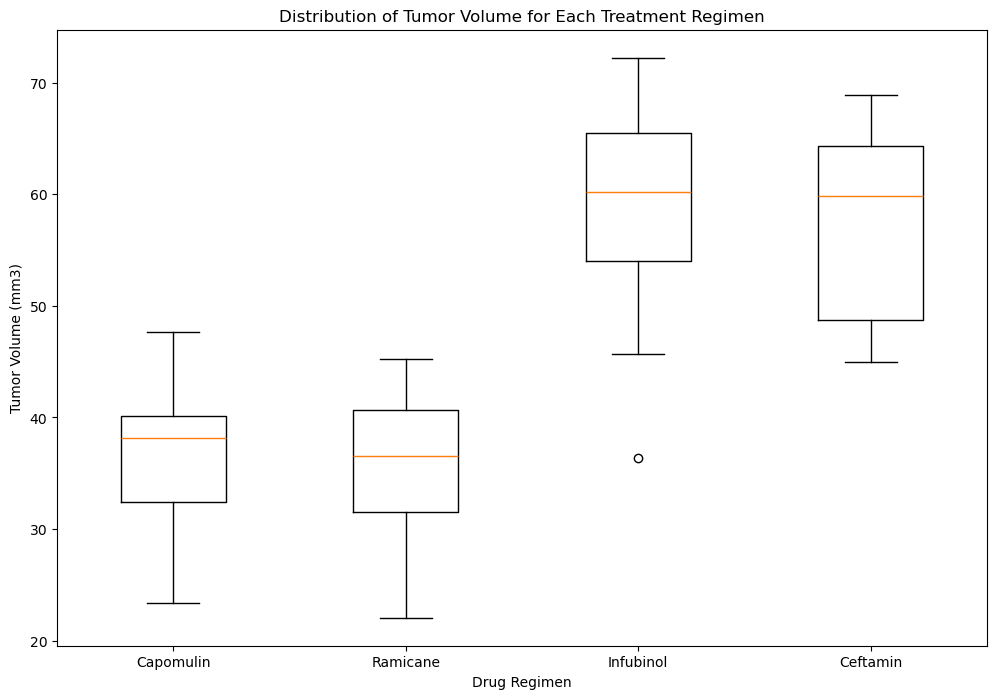

In [83]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(12, 8))
plt.boxplot(tumor_volumes, labels=treatments)
plt.title('Distribution of Tumor Volume for Each Treatment Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

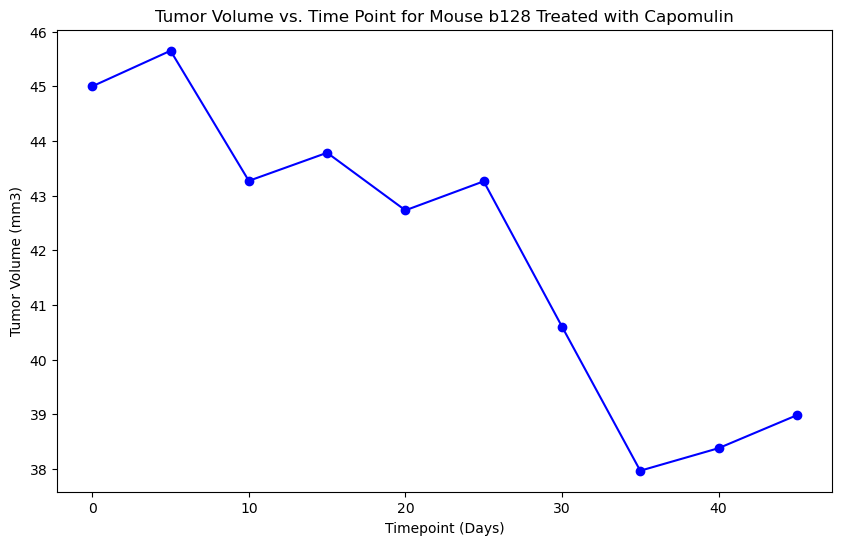

In [84]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
mouse_id = capomulin_data['Mouse ID'].unique()[0]
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} Treated with Capomulin')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

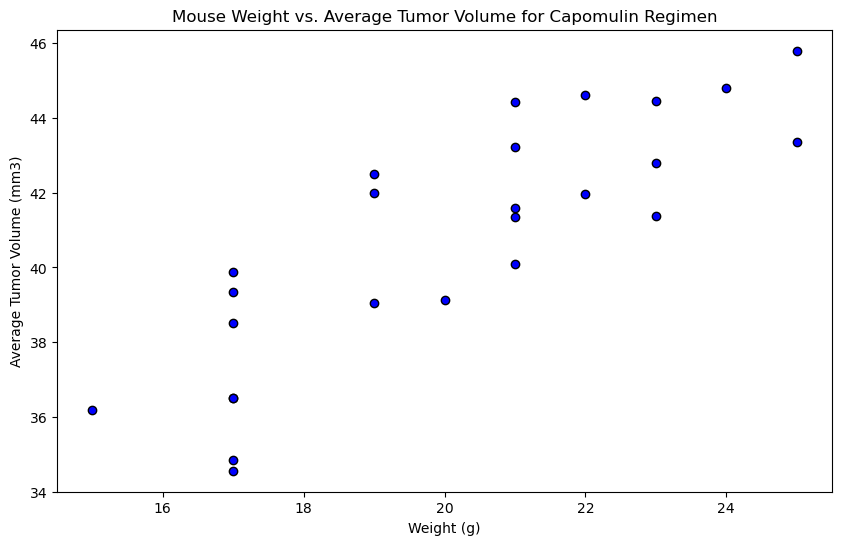

In [86]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor_volume = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean'}).reset_index()
mouse_metadata_filtered = mouse_metadata[['Mouse ID', 'Weight (g)']]
merged_data = pd.merge(avg_tumor_volume, mouse_metadata_filtered, on='Mouse ID')
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='blue', edgecolor='black')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

Correlation Coefficient: 0.8419363424694722


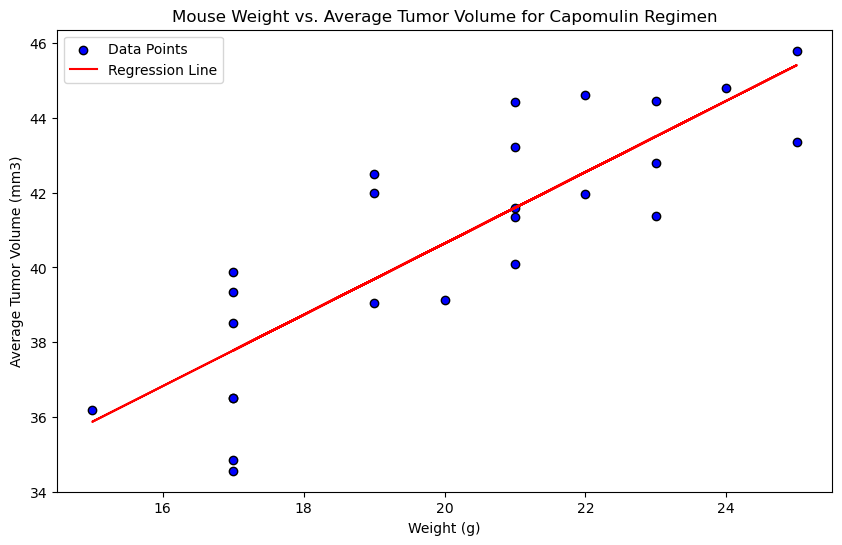

In [87]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weights = merged_data['Weight (g)']
tumor_volumes = merged_data['Tumor Volume (mm3)']
correlation_coefficient = np.corrcoef(weights, tumor_volumes)[0, 1]
print(f'Correlation Coefficient: {correlation_coefficient}')
slope, intercept, r_value, p_value, std_err = st.linregress(weights, tumor_volumes)
plt.figure(figsize=(10, 6))
plt.scatter(weights, tumor_volumes, color='blue', edgecolor='black', label='Data Points')
plt.plot(weights, intercept + slope * weights, color='red', label='Regression Line')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.show()